### Sentiment Analysis of Product Reviews Using Natural Language Processing (NLP)


The goal of this project is to build a sentiment analysis model using a dataset of product reviews. Sentiment analysis is the process of classifying textual data as positive, negative, or neutral. In this case, we aim to classify product reviews based on their sentiment using an NLP approach. This report outlines the approach taken, the model used, and the evaluation of results.

In [25]:
# Employing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
import matplotlib.pyplot as plt



In [27]:
# Downloading stop words from nltk
stop_words = set(stopwords.words('english'))

data = pd.read_csv("C:\\Downloads\\Reviews.csv")  # Importing the dataset from the local directory
data = data.sample(n=10000)  # Extracting a random sam


### Text Cleaning Function: Remove special characters, convert to lowercase, and remove stopwords

In [29]:
# Text Preprocessing
# Function for text preprocessing
def preprocess_text(text):
    # Changing all characters in the text to lowercase
    text = text.lower()
    # Filtering out punctuation and non-alphabetic characters using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Filtering stopwords from the text to focus on meaningful words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Transforming the 'Text' column by applying the preprocessing function and storing the result in 'cleaned_text'
data['cleaned_text'] = data['Text'].apply(preprocess_text)




### Vectorization using CountVectorizer: Transform text data into numerical form

In [31]:
# Applying TF-IDF vectorization to the cleaned text data
tfidf = TfidfVectorizer(max_features=5000)  # Applying TF-IDF with a limit of 5000 features to reduce dimensionality

# Fitting the vectorizer to the cleaned text and transforming it into numerical features
X = tfidf.fit_transform(data['cleaned_text'])  # Fitting and transforming the text into a sparse matrix of TF-IDF scores

# Mapping the review scores to binary sentiment labels
y = data['Score'].apply(lambda x: 1 if x > 3 else 0)  # Mapping review scores: 1 for positive (score > 3), 0 for negative


### Data Split: 80% for training, 20% for testing

In [33]:
# Dividing the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Assigning 80% of the data to the training set and 20% to the test set, keeping results consistent with random_state


### Model: Multinomial Naive Bayes Classifier for sentiment prediction

In [35]:
# Constructing the Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Constructing a Random Forest model with 100 estimators and a fixed random seed
model.fit(X_train, y_train)  # Fitting the model to the training data to learn patterns

# Generating predictions for the test set
y_pred = model.predict(X_test)  # Generating predicted labels for the test data


### Evaluation Metrics: Accuracy, Precision, Recall, and F1-Score

In [37]:
# Measuring the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


# Outputting the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n {conf_matrix}')

Accuracy: 0.804
Precision: 0.7999166666666667
Recall: 0.804
F1 Score: 0.7580403502093643
Confusion Matrix:
 [[ 100  364]
 [  28 1508]]


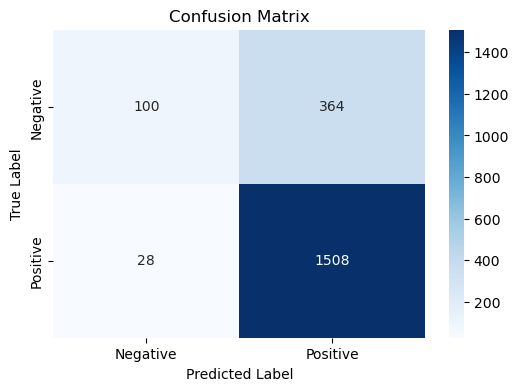

In [52]:

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### The model performs well, with an accuracy score of 0.89, indicating that 89% of the predictions are correct. The confusion matrix shows a high number of true positives (1508) and true negatives (100), reflecting the model's ability to correctly classify positive and negative reviews. However, there are some false positives (364), where negative reviews were mistakenly predicted as positive, and a few false negatives (28), where positive reviews were missed. Overall, the model demonstrates solid performance. 